In [198]:
import pandas as pd
import ffn
import pandas_datareader as pdat

pdat.get_data_yahoo('cfw.to', start='2010-01-01', end='2017-01-01').head()

In [199]:
today=dt.datetime.now().date().strftime('%Y-%m-%d') 
today

'2017-10-27'

In [245]:
data = ffn.get(['cfw.to','abcn.v','kat.to','tcw.to','tei.to','tko.to','u.to','xeg.to'], start='2016-01-01', end=today)
data.describe()#.tail()

,cfwto,abcnv,katto,tcwto,teito,tkoto,uto,xegto
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,3.610331,0.945992,0.730248,3.894959,1.001074,2.015289,3.732314,11.358910
std,0.775644,0.086659,0.232158,0.440642,0.132858,0.429341,0.131515,0.573184
min,2.300000,0.830000,0.360000,3.210000,0.800000,1.470000,3.490000,10.403746
25%,3.230000,0.890000,0.530000,3.490000,0.900000,1.640000,3.620000,10.870770
50%,3.400000,0.920000,0.740000,3.780000,0.970000,1.870000,3.730000,11.298050
75%,4.180000,0.990000,0.900000,4.280000,1.050000,2.330000,3.840000,11.800000
max,5.120000,1.240000,1.390000,4.760000,1.320000,2.920000,4.020000,12.545836


In [246]:
data1 = ffn.get(['ghg.cn'], start='2016-01-01', end=today)
data1#.tail()

,ghgcn
Date,
2017-10-27,0.04


In [267]:
returns = data.to_log_returns()#.dropna()
returns.head()

,cfwto,abcnv,katto,tcwto,teito,tkoto,uto,xegto
Date,,,,,,,,
2017-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-05,0.073203,0.000000,0.027399,0.088107,0.016529,0.013514,-0.007663,0.028726
2017-05-08,0.002937,-0.009950,0.052644,-0.021925,0.008163,-0.013514,0.007663,0.015255
2017-05-09,-0.035825,-0.105361,0.000000,-0.022417,0.000000,0.033448,-0.007663,-0.010413
2017-05-10,0.059014,-0.045462,0.000000,0.075187,0.008097,0.013072,0.000000,0.019929


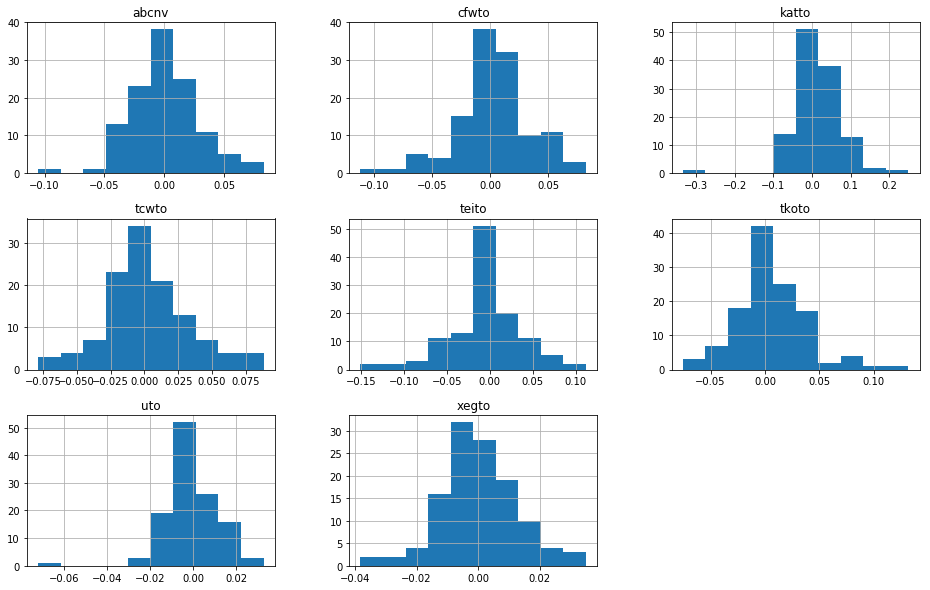

In [248]:
ax = returns.hist(figsize=(16, 10))

In [249]:
returns.corr().as_format('.2f')

,cfwto,abcnv,katto,tcwto,teito,tkoto,uto,xegto
cfwto,1.00,0.10,0.16,0.73,0.27,0.15,-0.12,0.63
abcnv,0.10,1.00,0.06,0.04,-0.07,0.10,0.02,0.01
katto,0.16,0.06,1.00,0.00,0.03,0.22,-0.02,0.06
tcwto,0.73,0.04,0.00,1.00,0.32,0.08,-0.07,0.76
teito,0.27,-0.07,0.03,0.32,1.00,0.20,-0.11,0.26
tkoto,0.15,0.10,0.22,0.08,0.20,1.00,0.29,0.09
uto,-0.12,0.02,-0.02,-0.07,-0.11,0.29,1.00,-0.04
xegto,0.63,0.01,0.06,0.76,0.26,0.09,-0.04,1.00


<module 'matplotlib.pyplot' from 'c:\\users\\kim\\miniconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

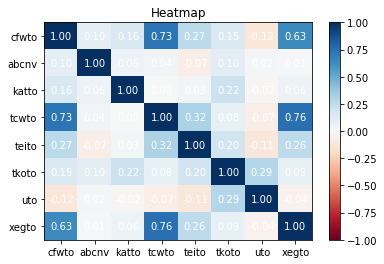

In [250]:
returns.plot_corr_heatmap()

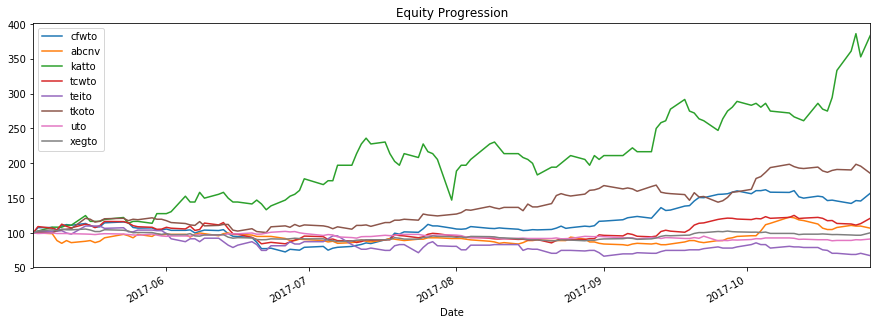

In [252]:
perf = data.calc_stats()
perf.plot()

c:\users\kim\miniconda3\lib\site-packages\ffn\core.py:855: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  pd.scatter_matrix(ser, figsize=figsize, **kwargs)


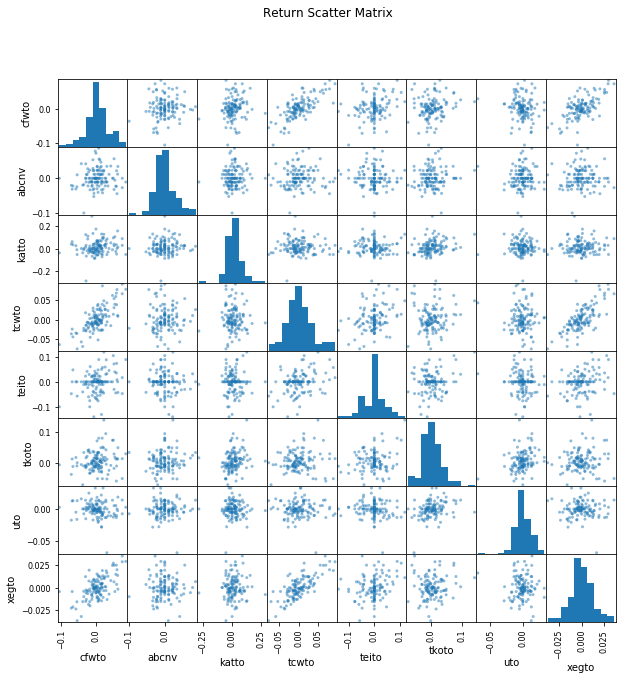

In [254]:
perf.plot_scatter_matrix()

In [255]:
perf.display()


Stat                 cfwto       abcnv       katto       tcwto       teito       tkoto       uto         xegto
-------------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
Start                2017-05-04  2017-05-04  2017-05-04  2017-05-04  2017-05-04  2017-05-04  2017-05-04  2017-05-04
End                  2017-10-27  2017-10-27  2017-10-27  2017-10-27  2017-10-27  2017-10-27  2017-10-27  2017-10-27
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         56.96%      6.93%       283.33%     21.05%      -32.50%     85.71%      -8.65%      0.22%
Daily Sharpe         2.13        0.54        3.32        1.05        -0.87       2.77        -0.85       0.12
Daily Sortino        3.04        0.95        5.00        1.94        -1.19       5.52        -1.03       0.20
CAGR                 154.88%     14.92%      1525.88%    48.66%      -55.77%     261.35%     -17.1

In [256]:
# we can also use perf[2] in this case
temp=perf['katto']
temp.display_lookback_returns()#daily_prices

mtd         32.69%
3m          79.22%
6m            nan%
ytd        283.33%
1y            nan%
3y            nan%
5y            nan%
10y           nan%
incep    1,525.88%
Name: katto, dtype: object

In [258]:
# we can also use perf[2] in this case
temp=perf['katto']
temp.display_monthly_returns()#daily_prices

  Year    Jan    Feb    Mar    Apr    May    Jun     Jul    Aug    Sep    Oct    Nov    Dec     YTD
------  -----  -----  -----  -----  -----  -----  ------  -----  -----  -----  -----  -----  ------
  2017      0      0      0      0  27.78  39.13  -17.19  39.62  40.54  32.69      0      0  283.33


In [268]:
returns.corr().as_format('.2f')

,cfwto,abcnv,katto,tcwto,teito,tkoto,uto,xegto
cfwto,1.00,0.10,0.16,0.73,0.27,0.15,-0.12,0.63
abcnv,0.10,1.00,0.06,0.04,-0.07,0.10,0.02,0.01
katto,0.16,0.06,1.00,0.00,0.03,0.22,-0.02,0.06
tcwto,0.73,0.04,0.00,1.00,0.32,0.08,-0.07,0.76
teito,0.27,-0.07,0.03,0.32,1.00,0.20,-0.11,0.26
tkoto,0.15,0.10,0.22,0.08,0.20,1.00,0.29,0.09
uto,-0.12,0.02,-0.02,-0.07,-0.11,0.29,1.00,-0.04
xegto,0.63,0.01,0.06,0.76,0.26,0.09,-0.04,1.00


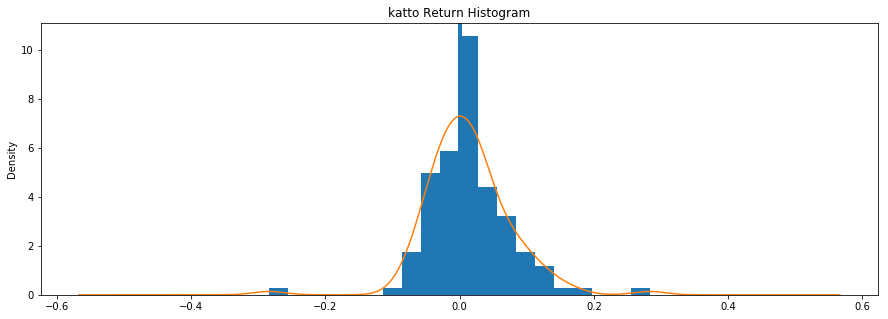

In [259]:
perf[2].plot_histogram()

In [269]:
perf['katto'].stats

start                2017-05-04 00:00:00
end                  2017-10-27 00:00:00
rf                                     0
total_return                     2.83333
daily_sharpe                      3.3202
daily_sortino                    5.00102
cagr                             15.2588
max_drawdown                   -0.376471
calmar                           40.5311
mtd                             0.326923
three_month                     0.792208
six_month                            NaN
daily_mean                       3.33772
daily_vol                        1.00528
daily_skew                      0.131946
daily_kurt                       5.59944
best_day                        0.283019
worst_day                      -0.283784
monthly_sharpe                   3.75465
monthly_sortino                      NaN
monthly_mean                     3.23516
monthly_vol                     0.861642
monthly_skew                    -2.15293
monthly_kurt                      4.6747
best_month      

In [270]:
returns.calc_mean_var_weights().as_format('.2%')

Exception: Iteration limit exceeded

In [271]:
returns.calc_ftca(threshold=0.8)

AttributeError: 'Series' object has no attribute 'order'

In [241]:
ffn.get('aapl:Open,aapl:High,aapl:Low,aapl:Close', start='2010-01-01', end='2014-01-01').head()

,aaplopen,aaplhigh,aapllow,aaplclose
Date,,,,
2010-01-04,30.490000,30.642857,30.340000,30.572857
2010-01-05,30.657143,30.798571,30.464285,30.625713
2010-01-06,30.625713,30.747143,30.107143,30.138571
2010-01-07,30.250000,30.285715,29.864286,30.082857
2010-01-08,30.042856,30.285715,29.865715,30.282858


In [242]:
 import ffn
>> returns = ffn.get('aapl,msft,c,gs,ge', start='2010-01-01').to_returns().dropna()
>> returns.calc_mean_var_weights().as_format('.2%')

SyntaxError: invalid syntax (<ipython-input-242-05272803c708>, line 2)